# Image Data Classification 

In [27]:
import requests
from bs4 import BeautifulSoup
#https://www.shopify.com/blog/17156388-22-awesome-websites-with-stunning-free-stock-images
#site toper demais 
url = 'https://burst.shopify.com/photos/search?q=forest'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

images = soup.find_all('img')

for image in images:
    print(image['src'])

https://burst.shopifycdn.com/photos/rockpile-in-forest.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/charred-trees-left-after-forest-fire-laid-in-grass.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/forest-road.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/sunrise-bursts-through-forest-trees.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/thick-lush-green-forest.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/northern-forest.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/sunlit-forest.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/forest-silhouette-at-sunset.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/winter-birch-forest.jpg?width=1200&format=pjpg&exif=1&iptc=1
https://burst.shopifycdn.com/photos/fog-rolls-through-forest-hillside.jpg?width=1200&fo

In [26]:
print(r)

<Response [403]>


In [9]:
print(soup.title.text)

Search: forest | Flickr


## Introdução ao Conjunto de Dados

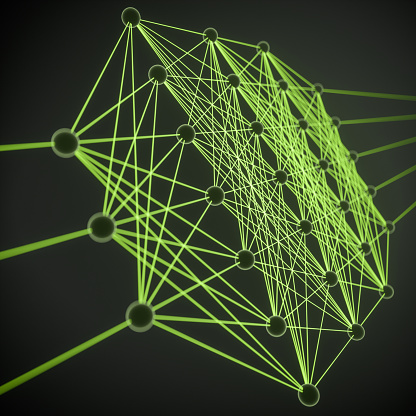

Olá tudo bem! 

Nesse projeto vamos utilizar um conjunto de dados de imagens, disponibilizado na plataforma de competições Kaggle, denomimado **Intel Image Classification**.

Esse conjunto de dados possui:
* 14034 imagens para treino
* 3000 imagens para validação 
* x imagens para teste final

As imagens são separadas em 6 classes diferentes:

* 0 - buildings;
* 1 - forest;
* 2 - glacier;
* 3 - mountain;
* 4 - sea;
* 5 - street.

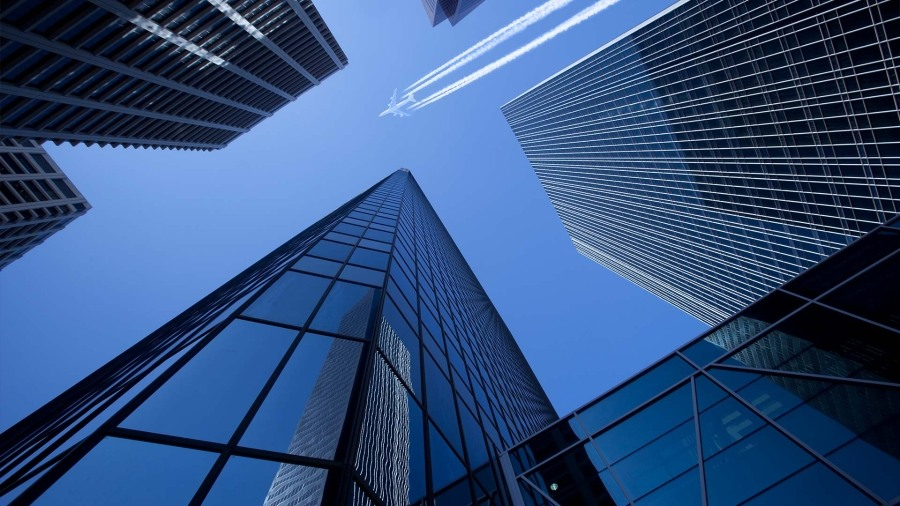

O intuito é criarmos um modelo de **Aprendizado de Máquina (AM)** para classificar qual classe uma imagem se refere. 

* Exemplo a foto acima - nós humanos sabemos que são edíficios, mas será que conseguimos utilizar alguma técnica de AM para identificar e classificar essa imagem.

Para isso utilizaremos o *Framework TensorFlow*. O *TensorFlow* é uma biblioteca disponivel em muitas linguagens de programação que possui como o objetivo a realização do pré-processamento de imagens e a criação de Redes Neurais Produndas (*Deep Learning*) para classificação.

Portanto, as técnicas de Redes Neurais que vamos aplicar são Redes Neurais Convolucionais **(*Convolutional Neural Networks - CNN*)**

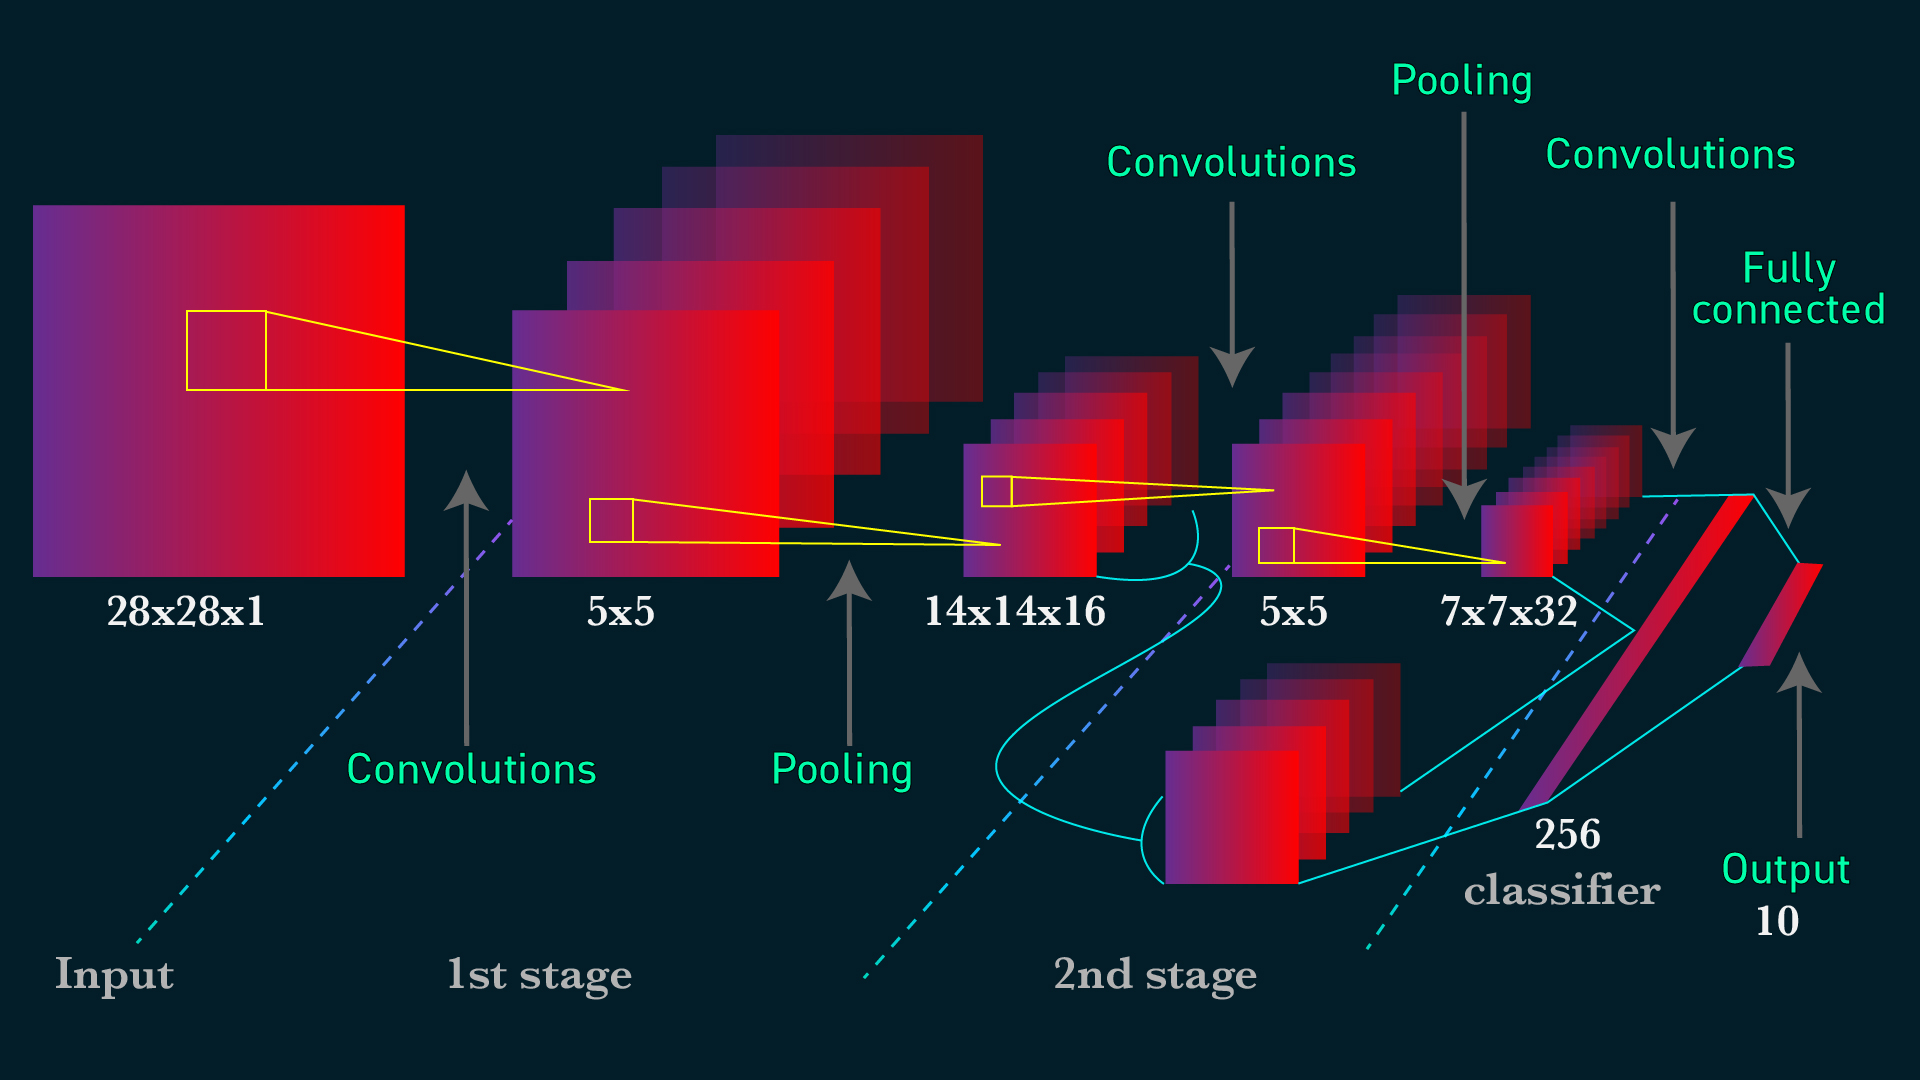

Mas antes de começarmos a criar as redes neurais vamos entender como é o banco de dados de imagens que vamos trabalhar 

## Diretórios e Subdiretórios 

In [7]:
#Importando bibliotecas 
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

2022-11-26 13:52:07.906880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-26 13:52:07.906944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


As imagens que utilizaremo encontra-se em arquivo zip denominado 'Intel_Image_Classification.zip'.

Essas imagens foram obtidas a partir do download na plataforma Kaggle, neste link: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

* Assim, abaixo foi extraído as imagens do arquivo.

In [39]:
#Arquivo com as imagens para treino encontra-se em uma pasta em formado de arquivo zip
arquivo_zip = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/Intel_Image_Classification.zip'

#necessário extrair as pastas de dentro do arquivo zip
zip_ = zipfile.ZipFile(arquivo_zip, 'r')
zip_.extractall('/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/')
zip_.close()

Foram extraídos 3 diretórios, denominados:
* seg_train: conjunto de dados de treino
* seg_test: conjunto de dados para validação 
* seg_pred: conjunto de dados final para última predição

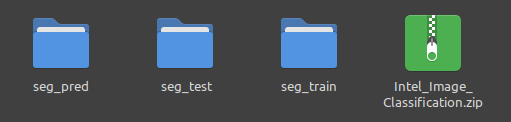

Portanto, devemos atribuir o caminho desses diretórios.

In [8]:
#diretorio_main
diretorio = '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/'

#criando variável diretorio train e validation 
diretorio_train = os.path.join(diretorio, 'seg_train/seg_train')
diretorio_validation = os.path.join(diretorio, 'seg_test/seg_test')
diretorio_test_final = os.path.join(diretorio, 'seg_pred/seg_pred')

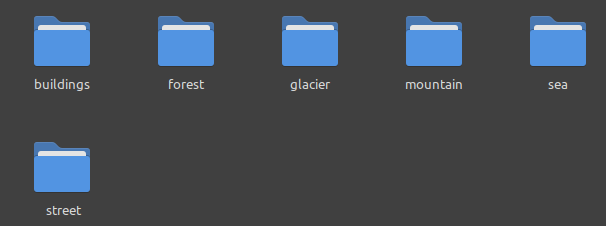

Dentro do diretório seg_train e seg_test há 6 subdiretórios denominados:

* street - ruas 
* buildings - edificios
* forest - florestas
* glacier - gelo
* mountain - montanhas
* sea - mar

Nota-se que cada subdiretório é destinado para um classe de imagens. 

No diretório seg_pred não há nenhum subdiretório, apenas os arquivos imagens com os  tipos de classes. Isso ocorre porque essa parte do conjunto de dados é para teste final que deve ser enviado para a plataforma Kaggle.

Para vermos as imagens que há dentro do subdiretório treino e validação precisamos criar um dicionário com os caminho de cada subdiretório.

In [14]:
dicio_train = {}
dicio_validation = {}

all_subdir = os.listdir(diretorio_train)

for subdir in all_subdir:
    dicio_train['seg_train' + '_' + subdir] = os.path.join(diretorio_train, subdir)

for subdir in all_subdir:
    dicio_validation['seg_test' + '_' + subdir] = os.path.join(diretorio_validation, subdir)


In [21]:
print(dicio_train)

print('\n')
print('caminho para seg_train_street = ', dicio_train['seg_train_street'])

{'seg_train_street': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/street', 'seg_train_sea': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/sea', 'seg_train_glacier': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/glacier', 'seg_train_forest': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/forest', 'seg_train_mountain': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/mountain', 'seg_train_buildings': '/home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/buildings'}


caminho para seg_train_street =  /home/rafael/Python/projetos/image_classification/primeiro_projeto_coursera/base_dados/seg_train/seg_train/street


In [24]:
print('QUANTIDADE DE IMAGENS POR CLASSE - TRAIN')
for subdir in dicio_train.keys():
    print(subdir, '=' , len(os.listdir(dicio_train[subdir])))

print('\n')
print('QUANTIDADE DE IMAGENS POR CLASSE - VALIDATION')    
for subdir in dicio_validation.keys():
    print(subdir, '=' , len(os.listdir(dicio_validation[subdir])))
    
print('\n')
print('QUANTIDADE DE IMAGENS POR CLASSE - TESTE FINAL')   
print(len(os.listdir(diretorio_test_final)))

QUANTIDADE DE IMAGENS POR CLASSE - TRAIN
seg_train_street = 2382
seg_train_sea = 2274
seg_train_glacier = 2404
seg_train_forest = 2271
seg_train_mountain = 2512
seg_train_buildings = 2191


QUANTIDADE DE IMAGENS POR CLASSE - VALIDATION
seg_test_street = 501
seg_test_sea = 510
seg_test_glacier = 553
seg_test_forest = 474
seg_test_mountain = 525
seg_test_buildings = 437


QUANTIDADE DE IMAGENS POR CLASSE - TESTE FINAL
7301


## 

In [33]:
#tipo = str(input('digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): '))
lista_fotos = []
indices = [0, 1, 2]

for caminho in dicio_train.keys():

    fotos = os.listdir(dicio_train[caminho])
    
    for indice in indices:
    
        caminho_foto = os.path.join(dicio_train[caminho], fotos[indice])
        lista_fotos.append(caminho_foto)

street


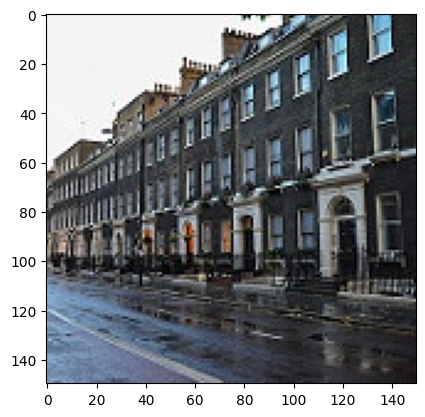

street


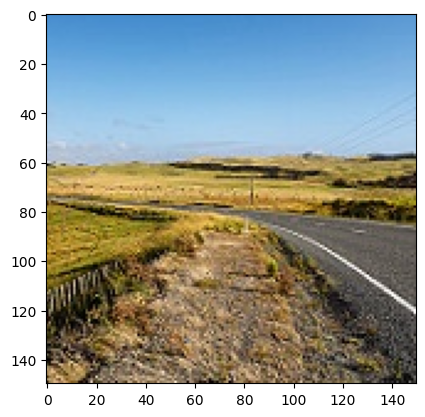

street


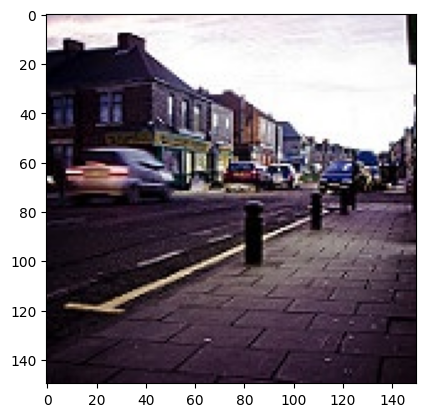

sea


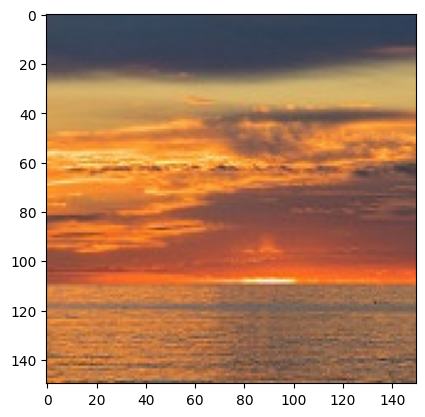

sea


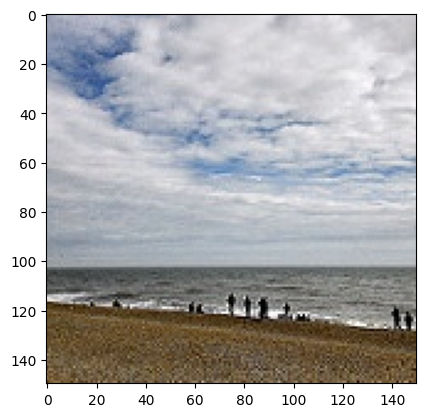

sea


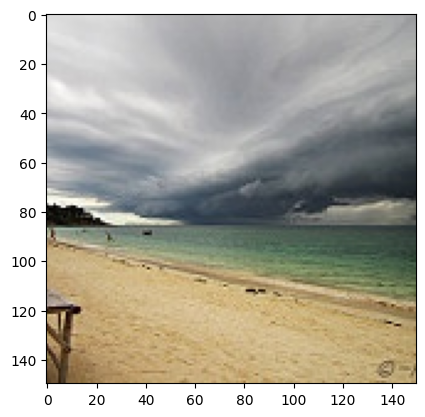

glacier


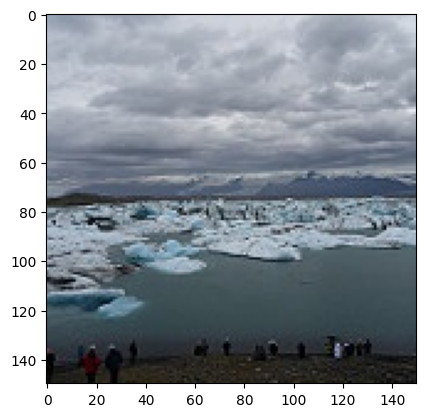

glacier


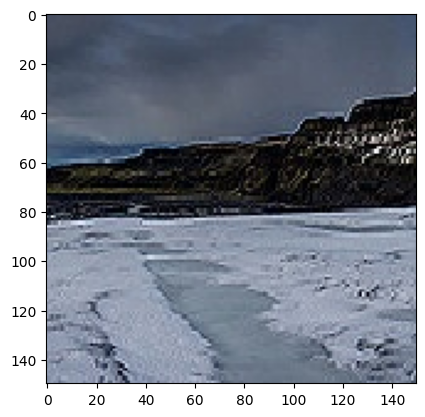

glacier


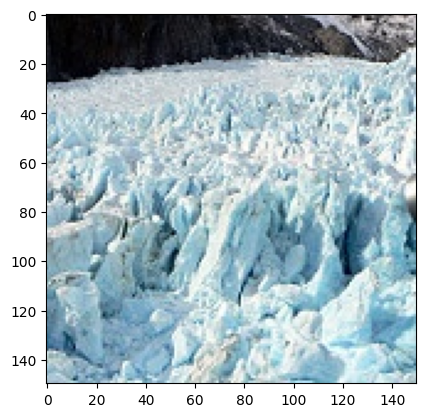

forest


forest


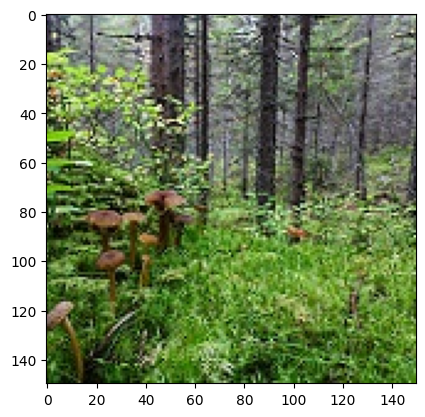

forest


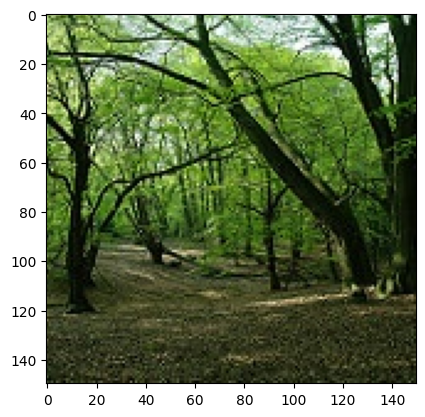

mountain


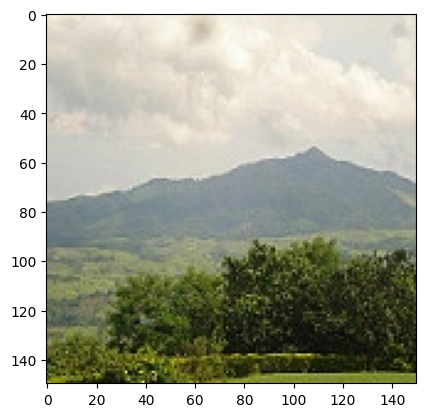

mountain


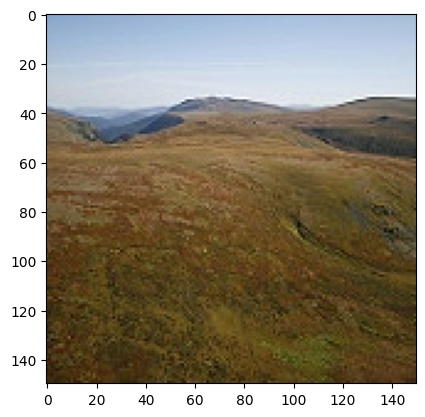

mountain


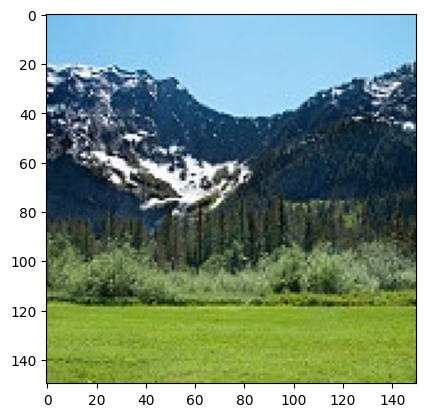

buildings


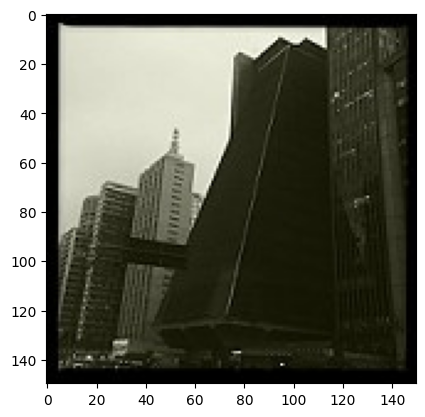

buildings


buildings


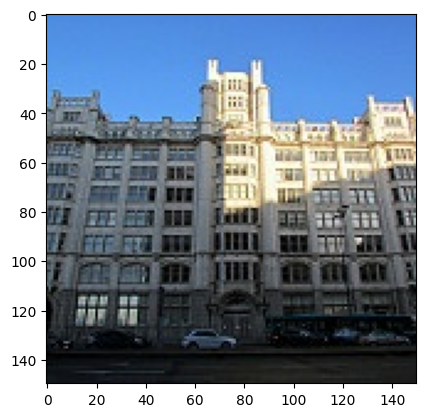

In [45]:

for i in range(0, len(lista_fotos),1):
    img = load_img(lista_fotos[i], target_size = (150,150))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    print(lista_fotos[i].split('/')[-2])
    plt.imshow(img_array)
    plt.show()

digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): sea
digite um indice:3


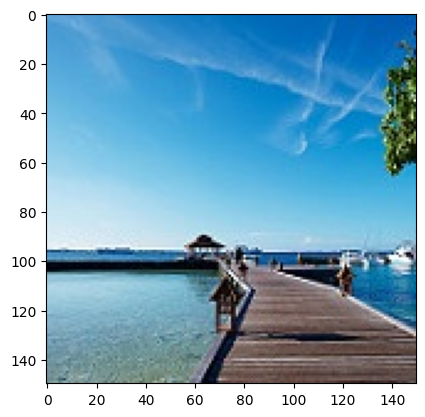

In [51]:
tipo = str(input('digite qual foto subdir deseja ver (street, sea, glacier, forest, mountain, buldings): '))

indice = int(input('digite um indice:')) 

fotos = os.listdir(dicio_train['seg_train_' + tipo])

caminho_foto = os.path.join(dicio_train['seg_train_' + tipo], fotos[indice])

img = load_img(caminho_foto, target_size = (150,150))
img_array = img_to_array(img)

img_array = img_array / 255.0

plt.imshow(img_array)

In [67]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 109, 
                                                   class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [83]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

In [87]:
from tensorflow.keras.optimizers import RMSprop

In [96]:
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

In [98]:
history = model.fit_generator(train_generator, epochs = 15,
                             steps_per_epoch = 128,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 2)

/tmp/ipykernel_49276/1353951702.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 15,


Epoch 1/15


2022-11-21 22:53:14.152304: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 152802304 exceeds 10% of free system memory.
2022-11-21 22:53:15.321305: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 152802304 exceeds 10% of free system memory.
2022-11-21 22:53:15.527318: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 152802304 exceeds 10% of free system memory.
2022-11-21 22:53:16.086180: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 152802304 exceeds 10% of free system memory.
2022-11-21 22:53:16.286821: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 152802304 exceeds 10% of free system memory.


128/128 - 109s - loss: 1.3078 - accuracy: 0.5061 - val_loss: 0.9972 - val_accuracy: 0.6260 - 109s/epoch - 854ms/step
Epoch 2/15
128/128 - 124s - loss: 0.9548 - accuracy: 0.6435 - val_loss: 0.8947 - val_accuracy: 0.6685 - 124s/epoch - 968ms/step
Epoch 3/15
128/128 - 117s - loss: 0.8211 - accuracy: 0.6948 - val_loss: 0.8065 - val_accuracy: 0.7092 - 117s/epoch - 915ms/step
Epoch 4/15
128/128 - 116s - loss: 0.7296 - accuracy: 0.7329 - val_loss: 0.7760 - val_accuracy: 0.7228 - 116s/epoch - 908ms/step
Epoch 5/15
128/128 - 119s - loss: 0.6560 - accuracy: 0.7660 - val_loss: 0.7533 - val_accuracy: 0.7215 - 119s/epoch - 932ms/step
Epoch 6/15
128/128 - 116s - loss: 0.5944 - accuracy: 0.7912 - val_loss: 0.7905 - val_accuracy: 0.7218 - 116s/epoch - 905ms/step
Epoch 7/15
128/128 - 117s - loss: 0.5471 - accuracy: 0.8101 - val_loss: 0.7403 - val_accuracy: 0.7137 - 117s/epoch - 916ms/step
Epoch 8/15
128/128 - 118s - loss: 0.4985 - accuracy: 0.8274 - val_loss: 0.6994 - val_accuracy: 0.7544 - 118s/epoch 

In [105]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

In [ ]:
fig, 

In [102]:
acc

[0.5061400532722473,
 0.64351886510849,
 0.6947935223579407,
 0.7328546047210693,
 0.7659605145454407,
 0.7911669611930847,
 0.8100538849830627,
 0.8273608684539795,
 0.8453859686851501,
 0.8605386018753052,
 0.8727468848228455,
 0.8853141665458679,
 0.8948653340339661,
 0.9055655002593994,
 0.914111316204071]

<AxesSubplot: >

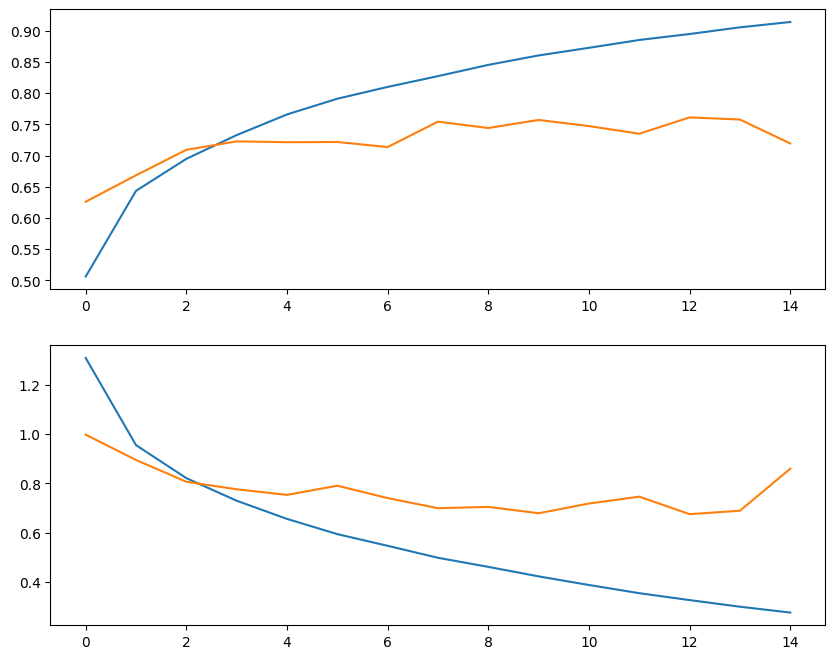

In [108]:
epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

In [109]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if((logs.get('accuracy') - logs.get('val_accuracy')) > 0.08):
            self.model.stop_training = True

callbacks = myCallback()

history = model.fit_generator(train_generator, epochs = 2,
                             steps_per_epoch = 128,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1,
                             callbacks = [callbacks])

Epoch 1/2


/tmp/ipykernel_49276/2831504720.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 2,


128/128 [==============================] - 108s 842ms/step - loss: 0.2481 - accuracy: 0.9269 - val_loss: 0.7450 - val_accuracy: 0.7381


In [111]:
#criando ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0, 
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = 0.2, 
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(diretorio_train, batch_size = 109, 
                                                   class_mode = 'categorical', target_size = (150,150))

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(diretorio_validation, batch_size = 23,
                                                             class_mode = 'categorical', target_size = (150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [113]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = RMSprop(lr = 0.0001))

/home/rafael/Python/env/tf_image_classification/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [114]:
history = model.fit_generator(train_generator, epochs = 15,
                             steps_per_epoch = 128,
                             validation_data = validation_generator,
                             validation_steps = 128, 
                             verbose = 1)

/tmp/ipykernel_49276/3072320047.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 15,


Epoch 1/15
128/128 [==============================] - 127s 990ms/step - loss: 1.4853 - accuracy: 0.4338 - val_loss: 1.1015 - val_accuracy: 0.5849
Epoch 2/15
128/128 [==============================] - 131s 1s/step - loss: 1.1343 - accuracy: 0.5603 - val_loss: 0.9442 - val_accuracy: 0.6399
Epoch 3/15
128/128 [==============================] - 131s 1s/step - loss: 1.0408 - accuracy: 0.6034 - val_loss: 0.8828 - val_accuracy: 0.6743
Epoch 4/15
128/128 [==============================] - 131s 1s/step - loss: 0.9961 - accuracy: 0.6229 - val_loss: 0.8674 - val_accuracy: 0.6654
Epoch 5/15
128/128 [==============================] - 131s 1s/step - loss: 0.9567 - accuracy: 0.6414 - val_loss: 0.9846 - val_accuracy: 0.6308
Epoch 6/15
128/128 [==============================] - 131s 1s/step - loss: 0.9194 - accuracy: 0.6536 - val_loss: 0.9154 - val_accuracy: 0.6559
Epoch 7/15
128/128 [==============================] - 133s 1s/step - loss: 0.8961 - accuracy: 0.6679 - val_loss: 1.0002 - val_accuracy: 0.6

In [115]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

epoch = range(len(acc))

fig, ax = plt.subplots(nrows = 2, figsize = (10, 8))

sns.lineplot(x = epoch, y = acc, ax = ax[0])
sns.lineplot(x = epoch, y = val_acc, ax = ax[0])

sns.lineplot(x = epoch, y = loss, ax = ax[1])
sns.lineplot(x = epoch, y = val_loss, ax = ax[1])

<AxesSubplot: >

In [66]:
3000 // 128

23

In [62]:
14034 // 128

109